In [1]:
"""
TODO:
Separate EDA notebook and Build Model notebook for easier changes
Try a model with super basic number of features (e.g. teammates role, opponents role, maybe region)
Fix spells columns
According to ML notes, reducing features fixes high variance (i.e. fixes overfitting)
    - the other option is adding more records, but that is not possible
    - i.e. gotta do some heavy feature engineering
"""

'\nTODO:\nSeparate EDA notebook and Build Model notebook for easier changes\nTry a model with super basic number of features (e.g. teammates role, opponents role, maybe region)\nFix spells columns\nAccording to ML notes, reducing features fixes high variance (i.e. fixes overfitting)\n    - the other option is adding more records, but that is not possible\n    - i.e. gotta do some heavy feature engineering\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
from scipy import stats
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from tensorflow import keras
from tensorflow.keras import layers

plt.style.use("seaborn-whitegrid")
# plt.xticks(rotation=45)

2022-05-07 17:50:58.867739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-07 17:50:58.867783: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
original = pd.read_csv("merged9.csv")

In [4]:
# Load data
data = pd.read_csv("merged9.csv")


In [5]:
# If you want to balance the target
# load = pd.read_csv("merged9.csv")
# num_wins = load['W/L'].value_counts()[0]
# num_losses = load['W/L'].value_counts()[1]
# load['W/L'].value_counts()

# data = load[load['W/L'] == "Win"].sample(num_losses)
# data = pd.concat([data, load[load['W/L'] == "Loss"]])
# data.shape

In [6]:
target_factorized, _ = data['W/L'].factorize()
target = data.pop('W/L')

In [7]:
# Get Categorical Columns
categorical_cols = (data.dtypes == 'object')
categorical_cols = list(categorical_cols[categorical_cols].index)

In [8]:
# Encode

# Encode categorical columns through OrdinalEncoder. note - this will make the column dtype == float which is not compatible with MI scores
# data.to_csv("before-encoding.csv", index=False)
# ordinal_encoder = OrdinalEncoder()
# data[categorical_cols] = ordinal_encoder.fit_transform(data[categorical_cols])  # I believe this is Data Leakage because the data has not been separated from train/valid sets
# data.to_csv("after-encoding.csv", index=False)

# Encode categorical columns through factorize()
for col in data.select_dtypes("object"):
    data[col], _ = data[col].factorize()

In [9]:
# # Find and list dupes
# target_col = 'W/L'
# c = 'bans'
# test = pd.concat(g for _, g in data.groupby(c) if len(g) > 1)

In [10]:
dtypes = data.dtypes
cols_to_scale = [col for col, dtype in dtypes.iteritems() if 'int' in str(dtype) or 'float' in str(dtype)]
scaled_cols = minmax_scaling(data[cols_to_scale], columns=cols_to_scale)
data[cols_to_scale] = scaled_cols

In [62]:
# cols_to_use = [
#     'teammate_role_top', 'teammate_role_jungle', 'teammate_role_mid', 'teammate_role_adc', 'teammate_role_support',
#     'enemy_role_top', 'enemy_role_jungle', 'enemy_role_mid', 'enemy_role_adc', 'enemy_role_support'
# ]
cols_to_use = [
    'teams_region', 'teammate_role_mid', 'tournament_type', 'tournament_curr_win_percentage'
]
num_cols = len(cols_to_use)
train_X, val_X, train_y, val_y = train_test_split(data[cols_to_use], target_factorized, random_state=1)

In [63]:
# sns.pairplot(original,hue='W/L',palette = ["#E9223E","#000000"])
# sns.set(rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})
# sns.set_style('white')
# plt.show()

<AxesSubplot:ylabel='tournament_curr_win_percentage'>

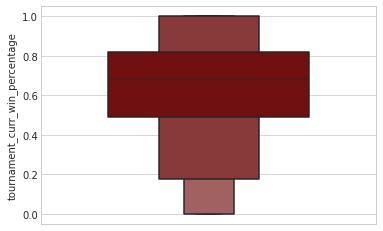

In [64]:
# fig = plt.figure(figsize=(8,8))
# gs = fig.add_gridspec(1,1)
# ax1 = fig.add_subplot(gs[0,0])
# ax1.text(-0.05, 20, 'tournament_curr_win_percentage', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
# ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y=data['tournament_curr_win_percentage'],palette=["#800000"],width=0.6)

<AxesSubplot:xlabel='W/L', ylabel='count'>

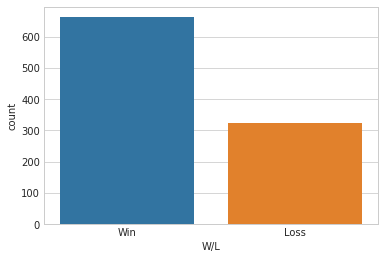

In [65]:
sns.countplot(data=original, x = 'W/L')

# Might need to equalize the target
Randomly choose ~300 rows that have the target 'Win'

<AxesSubplot:xlabel='Side', ylabel='count'>

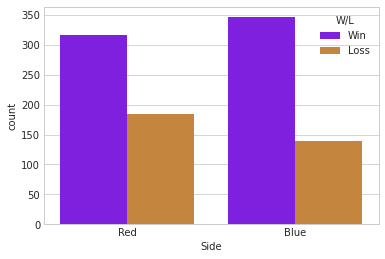

In [66]:
sns.countplot(data=original,x='Side',palette=["#8000ff","#da8829"], hue='W/L')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Artillery'),
  Text(1, 0, 'Battlemage'),
  Text(2, 0, 'Burst'),
  Text(3, 0, 'Assassin'),
  Text(4, 0, 'Vanguard'),
  Text(5, 0, 'Diver'),
  Text(6, 0, 'Nimble'),
  Text(7, 0, 'Skirmisher'),
  Text(8, 0, 'Enchanter'),
  Text(9, 0, 'Glasscannon'),
  Text(10, 0, 'Warden'),
  Text(11, 0, 'Juggernaut')])

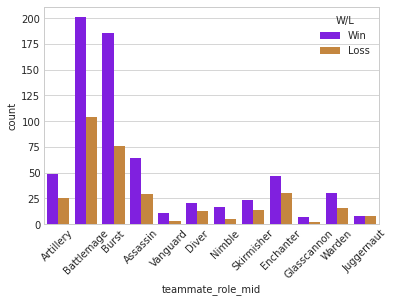

In [67]:
sns.countplot(data=original,x='teammate_role_mid',palette=["#8000ff","#da8829"], hue='W/L')
plt.xticks(rotation=45)

In [68]:
copy = original.copy()
for col in copy.select_dtypes("object"):
    copy[col], _ = copy[col].factorize()

In [69]:
copy.head()

,Date,Tournament,W/L,Side,Vs_Team,Game_Length,Champion,Vs_Champion,Kills,Deaths,...,teammate_top_ign,teammate_jungle_ign,teammate_mid_ign,teammate_adc_ign,teammate_support_ign,opponent_top_ign,opponent_jungle_ign,opponent_mid_ign,opponent_adc_ign,opponent_support_ign
0,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,1,1,12,2,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,1,2,2,2,2,6,...,0,0,0,0,0,1,1,1,1,1
3,3,0,0,1,1,3,3,3,7,3,...,0,0,0,0,0,1,1,1,1,1
4,4,0,0,1,2,4,4,0,6,3,...,0,0,0,0,0,2,2,2,2,2


In [70]:
test = copy.groupby(["teammate_role_mid", "W/L"]).count()
test

Date  Tournament  Side  Vs_Team  Game_Length  Champion  \
teammate_role_mid W/L                                                           
0                 0      49          49    49       49           49        49   
                  1      25          25    25       25           25        25   
1                 0     201         201   201      201          201       201   
                  1     104         104   104      104          104       104   
2                 0     185         185   185      185          185       185   
                  1      76          76    76       76           76        76   
3                 0      64          64    64       64           64        64   
                  1      29          29    29       29           29        29   
4                 0      11          11    11       11           11        11   
                  1       3           3     3        3            3         3   
5                 0      20          20    20       20           20        20   
                  1      13          13    13       13           13        13   
6                 0      17          17    17       17           17        17   
                  1       5           5     5        5            5         5   
7                 0      23          23    23       23           23        23   
                  1      14          14    14       14           14        14   
8                 0      47          47    47       47           47        47   
                  1      30          30    30       30           30        30   
9                 0       7           7     7        7            7         7   
                  1       2           2     2        2            2         2   
10                0      30          30    30       30           30        30   
                  1      16          16    16       16           16        16   
11                0       8           8     8        8            8         8   
                  1       8           8     8        8            8         8   

                       Vs_Champion  Kills  Deaths  Assists  ...  \
teammate_role_mid W/L                                       ...   
0                 0             49     49      49       49  ...   
                  1             25     25      25       25  ...   
1                 0            201    201     201      201  ...   
                  1            104    104     104      104  ...   
2                 0            185    185     185      185  ...   
                  1             76     76      76       76  ...   
3                 0             64     64      64       64  ...   
                  1             29     29      29       29  ...   
4                 0             11     11      11       11  ...   
                  1              3      3       3        3  ...   
5                 0             20     20      20       20  ...   
                  1             13     13      13       13  ...   
6                 0             17     17      17       17  ...   
                  1              5      5       5        5  ...   
7                 0             23     23      23       23  ...   
                  1             14     14      14       14  ...   
8                 0             47     47      47       47  ...   
                  1             30     30      30       30  ...   
9                 0              7      7       7        7  ...   
                  1              2      2       2        2  ...   
10                0             30     30      30       30  ...   
                  1             16     16      16       16  ...   
11                0              8      8       8        8  ...   
                  1              8      8       8        8  ...   

                       teammate_top_ign  teammate_jungle_ign  \
teammate_role_mid W/L                                          
0                 0                  49      

In [71]:
foo = copy.groupby("teammate_role_mid")['W/L'].value_counts(normalize=True)
# foo = copy.groupby("teammate_role_mid")['W/L'].value_counts(normalize=True).unstack(fill_value=0)
frame = {}
role, win_loss, rate = [], [], []
for r, test in foo.iteritems():
    role.append(r[0])
    win_loss.append(r[1])
    rate.append(test)

result = pd.DataFrame()
result['role'] = role
result['win_loss'] = win_loss
result['rate'] = rate
result.head()
roles = result.role.unique()

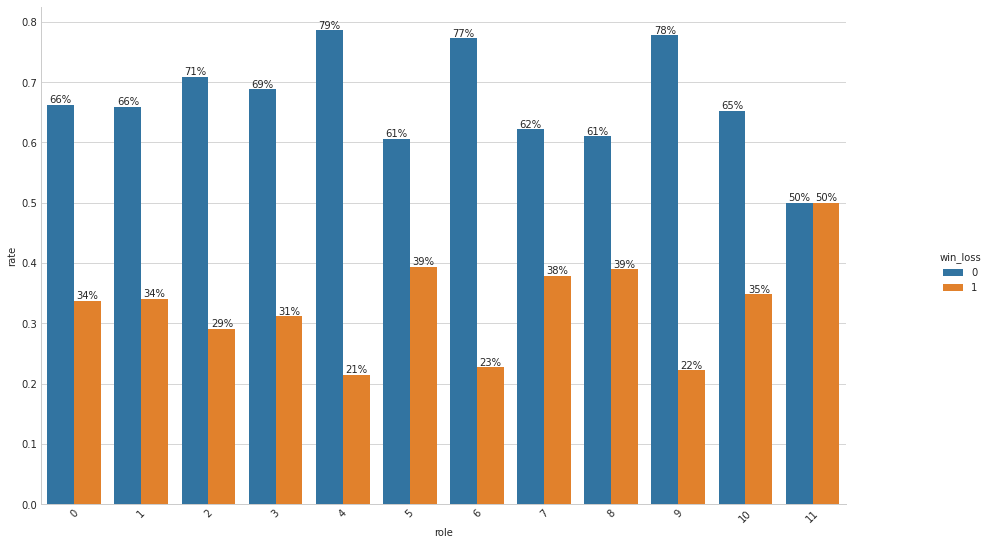

In [72]:
catp = sns.catplot(x="role", y="rate", hue="win_loss", data=result, kind="bar")
# g = sns.catplot(x="role", y="rate",
#                 col="win_loss",
#                 data=result, saturation=.5,
#                 kind="bar", ci=None, aspect=.6)
# plt.xticks(rotation=45)
# (g.set_axis_labels("", "Percentage")
#   .set_xticklabels(roles)
#   .set_titles("{col_name} {col_var}")
#   .set(ylim=(0, 1))
#   .despine(left=True))
plt.xticks(rotation=45)

# spots = zip(catp.ax.patches, roles)
# print(spots)
# for spot in spots:
#   print(spot[0])
#     # class_total = len(titanic[titanic['class']==spot[1][0]])
#     # class_who_total = len(titanic[(titanic['class']==spot[1][0]) & 
#     #     (titanic['who']==spot[1][1])])
#     # height = spot[0].get_height() 
#     # catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(class_who_total/class_total))

catp.fig.set_size_inches(15, 8)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = catp.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()) * 100:.0f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [73]:
print(result[result.win_loss == "Win"].rate.describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: rate, dtype: float64


With the mean being 67% and std being 8%, "outliers" could be defined as outside +-8% of 67% (i.e. above 75%, below 69%).
Therefore, Faker performs extra well with GlassCannons, Nimble, and Vanguard champions. Faker performs poorly with Juggernaut.

In [74]:
# copy[(copy["teammate_role_mid"] == "Glasscannon")
#       | (copy["teammate_role_mid"] == "Nimble")
#       | (copy["teammate_role_mid"] == "Vanguard")].Champion.unique()

In [75]:
# copy[copy.teammate_role_mid == "Juggernaut"].Champion.unique()

In [109]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[num_cols]),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    # layers.Dense(512, activation='relu'),
    # layers.Dropout(rate=0.1),
    # layers.BatchNormalization(),
    # layers.Dense(512, activation='relu'),
    # layers.Dropout(rate=0.1),
    # layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

In [110]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [111]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

In [112]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

<AxesSubplot:title={'center':'Accuracy'}>

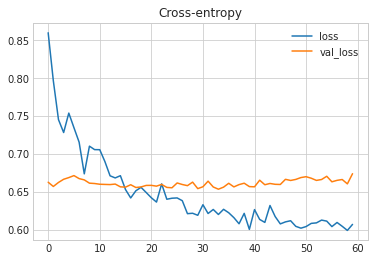

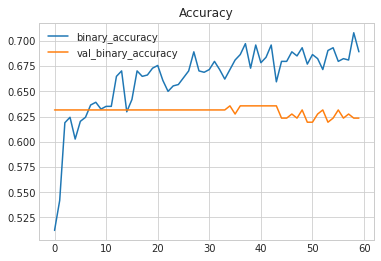

In [113]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

'Side', 'Vs_Team', 'Champion', 'Spells', 'tournaments_played', 'tournament_curr_total_games', 'tournament_curr_wins', 'tournament_curr_losses', 'tournament_curr_win_percentage', 'tournament_type', 'teams_region', 'teammate_role_top', 'teammate_role_jungle', 'teammate_role_mid', 'teammate_role_adc', 'teammate_role_support', 'enemy_role_top', 'enemy_role_jungle', 'enemy_role_mid', 'enemy_role_adc', 'enemy_role_support', 'teammate_top_champion', 'teammate_jungle_champion', 'teammate_adc_champion', 'teammate_support_champion', 'opponent_top_champion', 'opponent_jungle_champion', 'opponent_mid_champion', 'opponent_adc_champion', 'opponent_support_champion', 'teammate_top_ign', 'teammate_jungle_ign', 'teammate_adc_ign', 'teammate_support_ign', 'opponent_top_ign', 'opponent_jungle_ign', 'opponent_mid_ign', 'opponent_adc_ign', 'opponent_support_ign']

val_binary_accuracy ~= 65% \
binary_accuracy ~= 71%



<hr>
no *_ign or *_champion

val_binary_accuracy ~= 64% \
binary_accuracy ~= 69%

<hr>
balanced number of targets (325)

val_binary_accuracy ~= 60% \
binary_accuracy ~= 70%

In [114]:
# # Correlation Matrix
# fig = plt.figure(figsize=(10,10))
# gs = fig.add_gridspec(1,1)
# gs.update(wspace=0.3, hspace=0.15)
# ax0 = fig.add_subplot(gs[0,0])
# df_corr = data.corr().transpose()
# color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
# ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
# df_corr = data.corr().transpose()
# sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
# plt.show()

In [119]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

ModuleNotFoundError: No module named 'torch'

In [118]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(train_X,train_y)

# predicting the values
y_pred = clf.predict(val_X)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(val_y, y_pred))

The test accuracy score of SVM is  0.631578947368421


In [ ]:
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(train_X, train_y)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(val_X)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))